#

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [7]:
R = 500
N = 101
rng = np.random.default_rng()
cms = np.zeros(R)
for r in range(R):          
    x = rng.binomial(10, 0.5, size = N)
    cms[r] = np.mean(x)

In [8]:
Binomial = st.binom
B = Binomial(10, 0.5)
(B.mean(), B.var())

(5.0, 2.5)

In [9]:
Normal = st.norm
Nd = Normal(loc = B.mean(), scale = np.sqrt(B.var() / N))

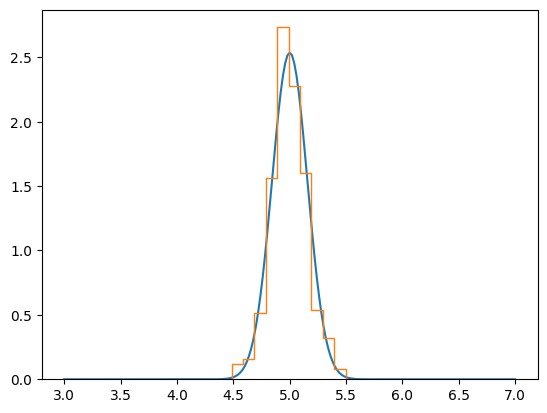

In [10]:
xx = np.linspace(3, 7, 201)
fx = Nd.pdf(xx)
plt.plot(xx, fx)
plt.hist(cms, density = True, histtype = "step");

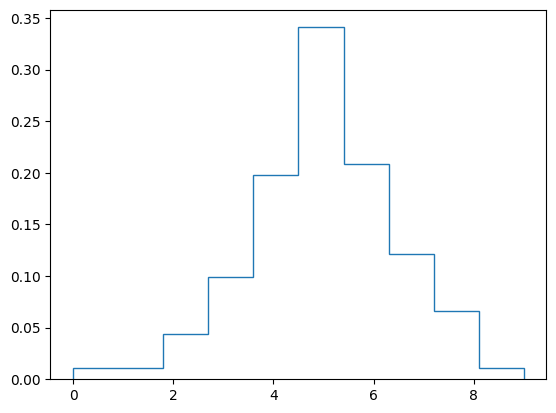

In [48]:
plt.hist(x, density = True, histtype = "step");

In [24]:
x = rng.exponential(10, size = N)

In [28]:
# Classical t-distribution Confidence Interval
xbar = np.mean(x)
se = np.sqrt(np.var(x) / N)
t = st.t(df = N - 1).ppf(0.975) # 95%
xbar - t * se

8.005170633409088

In [29]:
xbar + t * se

12.015769286302538

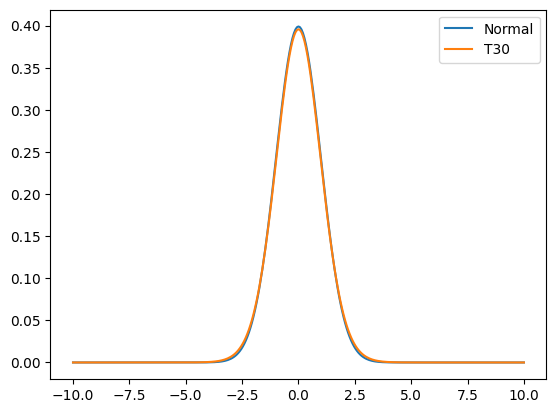

In [16]:
Normal = st.norm()
df = 30
T = st.t(df = df)
xx = np.linspace(-10, 10, 301)
nx = Normal.pdf(xx)
tx = T.pdf(xx)
plt.plot(xx, nx, label = "Normal")
plt.plot(xx, tx, label = f"T{df}")
plt.legend()

In [33]:
# Bootstrap Confidence Interval
cms = np.zeros(R)
for r in range(R):
    idx = rng.integers(N, size = N)
    bx = x[idx]
    cms[r] = np.mean(bx)

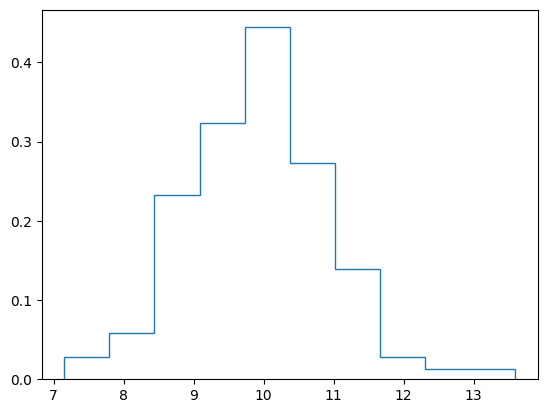

In [34]:
plt.hist(cms, density = True, histtype = "step");

In [35]:
np.quantile(cms, [0.025, 0.975])

array([ 8.03633737, 12.06008983])